In [1]:
#Importamos las librerias 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
g20=pd.read_csv('GyC20.csv')
g21=pd.read_csv('GyC21.csv')
g22=pd.read_csv('GyC22.csv')
g23=pd.read_csv('GyC23.csv')

g20=g20.drop(['Unnamed: 0'],axis=1)
g21=g21.drop(['Unnamed: 0'],axis=1)
g22=g22.drop(['Unnamed: 0'],axis=1)
g23=g23.drop(['Unnamed: 0'],axis=1)

In [6]:
cuantitativas = g21.iloc[:,8:15]
cuantitativas.info()

cualitativas = g21.iloc[:,[0,1,2,3,4,5,6,7,16,17]]
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TC         3035 non-null   float64
 1   IMPORTE    3035 non-null   float64
 2   IVA        3035 non-null   float64
 3   RET ISR    3035 non-null   float64
 4   RET IVA    3035 non-null   float64
 5   TOTAL MX   3035 non-null   float64
 6   TOTAL SAT  3035 non-null   float64
dtypes: float64(7)
memory usage: 166.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA        3035 non-null   object
 1   FOLIO        2888 non-null   object
 2   UUID         3035 non-null   object
 3   RFC          3035 non-null   object
 4   PROVEEDOR    3035 non-null   object
 5   TIPO GASTO   3035 non-null   object
 6   DESCRIPCION  3035 non-null   object
 7   MP         

<Figure size 1500x800 with 0 Axes>

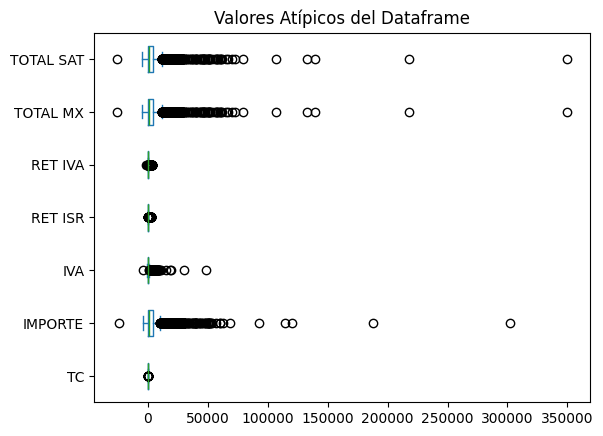

In [7]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [9]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64
Limite inferior permitido TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [10]:
datag21= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
datag21

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [11]:
valores_nulos=datag21.isnull().sum()
valores_nulos

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

In [12]:
data_clean=datag21.copy()
data_clean=data_clean.fillna(round(datag21.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [13]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [14]:
Datos_limpios = pd.concat([data_clean, cualitativas], axis=1)
Datos_limpios

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,STATUS,POLIZA
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,Vigente,0
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,Vigente,0
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,Vigente,0
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,Vigente,0
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,Vigente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,NaN,Vigente,NaN
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,Vigente,NaN
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,Vigente,NaN
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,Vigente,NaN


In [15]:
Datos_limpios.to_csv('G21imputado.csv')